# TIMESERIES FORECASTING FOR WEATHER PREDICTION: 
## Predicting precipitation amount in Dublin

In [2]:
%run functions.ipynb

Our data cames from [Kaggle](https://www.kaggle.com/datasets/dariasvasileva/hourly-weather-data-in-ireland-from-24-stations) and contains hourly information about weather in Ireland recorded in 24 stations. We took data recorded in Dublin's station.

In [12]:
data = pd.read_csv("../532_dublin_airport.csv", sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263737 entries, 0 to 263736
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  263737 non-null  int64  
 1   date        263737 non-null  object 
 2   ind         263737 non-null  int64  
 3   rain        263737 non-null  float64
 4   ind.1       263737 non-null  int64  
 5   temp        263737 non-null  float64
 6   ind.2       263737 non-null  int64  
 7   wetb        263737 non-null  float64
 8   dewpt       263737 non-null  float64
 9   vappr       263736 non-null  float64
 10  rhum        263736 non-null  float64
 11  msl         263737 non-null  float64
 12  ind.3       263737 non-null  int64  
 13  wdsp        263737 non-null  int64  
 14  ind.4       263737 non-null  int64  
 15  wddir       263735 non-null  float64
 16  ww          263737 non-null  int64  
 17  w           263737 non-null  int64  
 18  sun         263737 non-null  float64
 19  vi

It has the following variables with the relative unit of measure:
- date: Date and Time of observation
- ind: Encoded Rainfall Indicators 
- rain: Precipitation Amount, mm
- ind.1: Encoded Temperature Indicators 
- temp: Air Temperature, °C
- ind.2: Encoded Wet Bulb Indicators 
- wetb: Wet Bulb Air Temperature, °C
- dewpt: Dew Point Air Temperature, °C
- vappr: Vapour Pressure, hPa
- rhum: Relative Humidity, %
- msl: Mean Sea Level Pressure, hPa
- ind.3: Encoded Wind Speed Indicators 
- wdsp: Mean Hourly Wind Speed, knot
- ind.4: Encoded Wind Direction Indicators
- wddir: Predominant Hourly wind Direction, degree
- ww: Synop Code Present Weather 
- w: Synop Code Past Weather 
- sun: Sunshine duration, hours
- vis: Visibility, m
- clht: Cloud Ceiling Height, 100s of feet
- clamt: Cloud Amount, okta

All the 5 categorical indicators (ind, ind.1, ind.2, ind.3, ind.4) refer to a continuous variable (e.g. rainfall indicator is related to precipitation amount). We choose to remove them and just keep the continuous variables. We also remove all nan values , cloud ceiling height (we keep only cloud amount) and the Unnamed: 0 variable with the indexing.

In [4]:
data = data.drop("Unnamed: 0", axis=1)
data = data.drop('ind', axis=1)
data = data.drop('ind.1', axis=1)
data = data.drop('ind.2', axis=1)
data = data.drop('ind.3', axis=1)
data = data.drop('ind.4', axis=1)
data = data.drop('clht', axis=1)
data = data.dropna(axis=0)
data.head()

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,ww,w,sun,vis,clamt
0,1992-01-01 00:00:00,0.0,8.4,6.6,4.3,8.3,75.0,1023.9,23,210.0,2,11,0.0,25000,3
1,1992-01-01 01:00:00,0.0,8.6,6.6,4.0,8.1,73.0,1023.5,23,220.0,2,11,0.0,25000,6
2,1992-01-01 02:00:00,0.0,9.0,7.0,4.5,8.4,73.0,1022.4,22,220.0,2,11,0.0,25000,6
3,1992-01-01 03:00:00,0.0,9.5,7.4,4.8,8.6,73.0,1022.0,22,220.0,2,11,0.0,25000,6
4,1992-01-01 04:00:00,0.0,9.5,7.4,4.8,8.6,73.0,1022.0,23,230.0,2,11,0.0,25000,6


### Data Visualisation

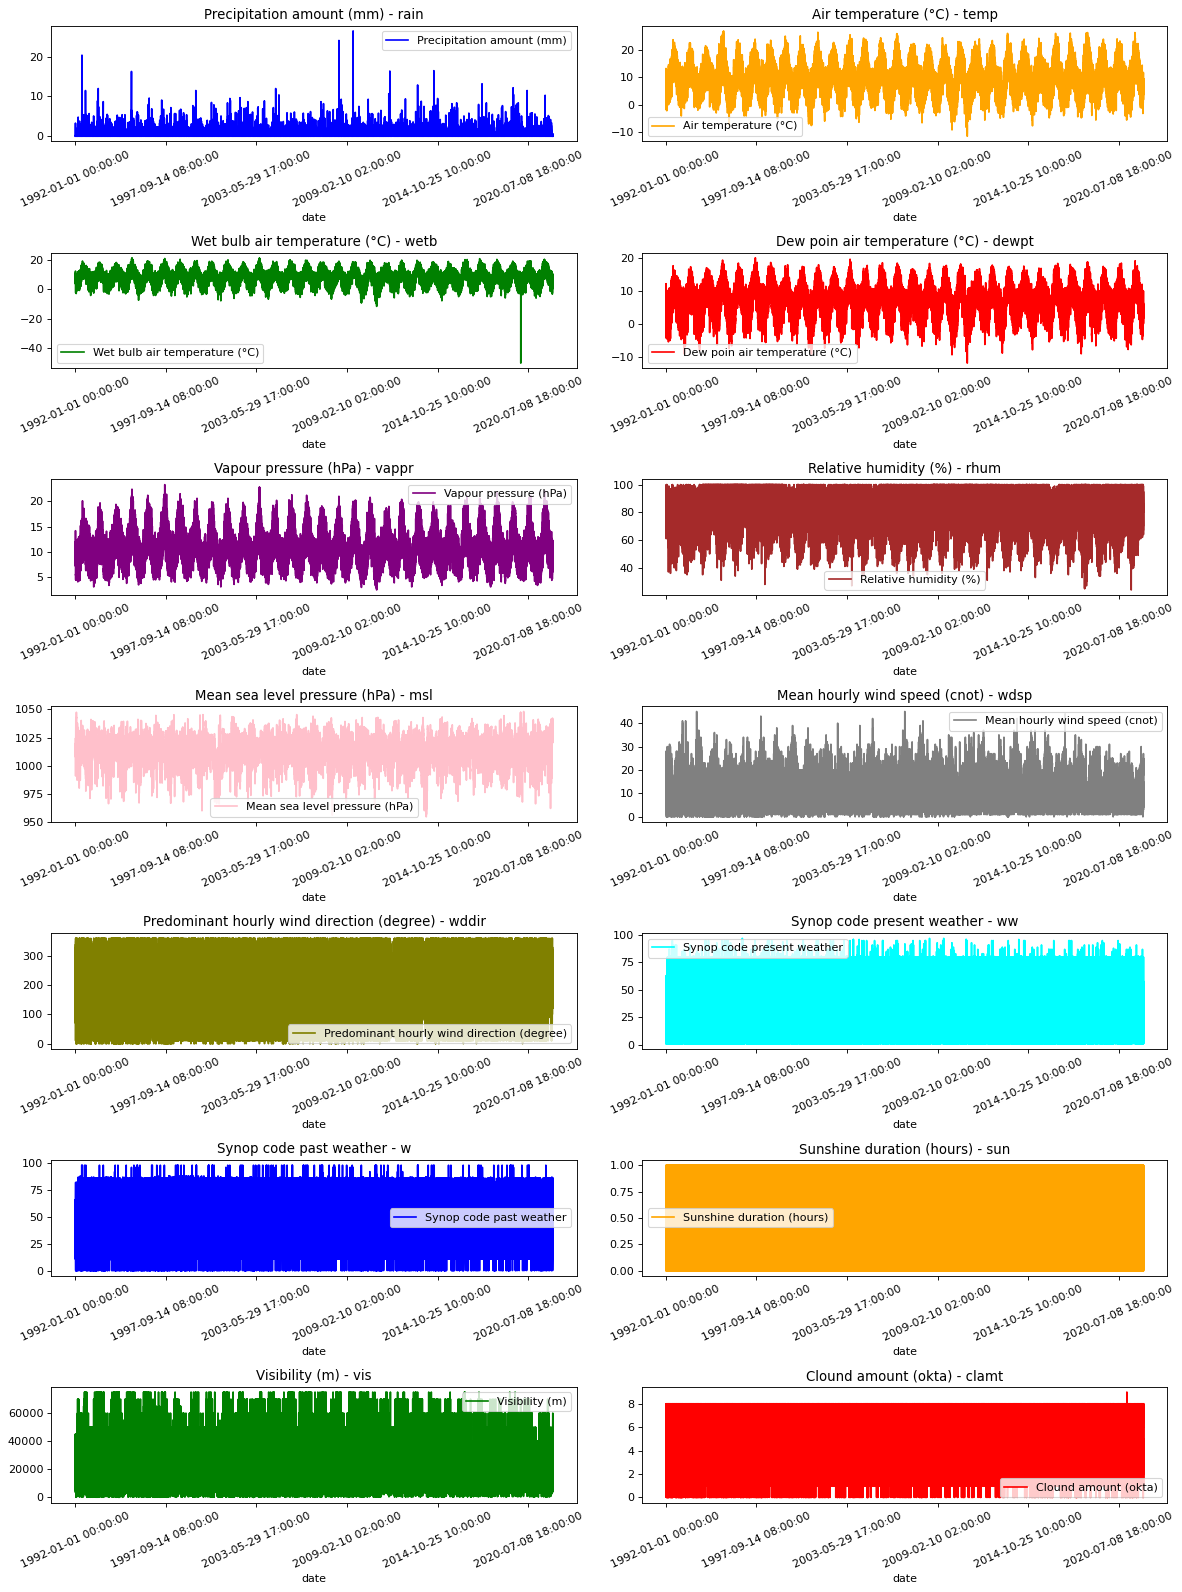

In [5]:
titles = [
    "Precipitation amount (mm)",
    "Air temperature (°C)",
    "Wet bulb air temperature (°C)",
    "Dew poin air temperature (°C)",
    "Vapour pressure (hPa)",
    "Relative humidity (%)",
    "Mean sea level pressure (hPa)",
    "Mean hourly wind speed (cnot)",
    "Predominant hourly wind direction (degree)",
    "Synop code present weather",
    "Synop code past weather",
    "Sunshine duration (hours)",
    "Visibility (m)",
    "Clound amount (okta)"
]


colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan"
]

def show_raw_visualization(data):
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k")
    for i in range(len(titles)):
        c = colors[i % (len(colors))]
        t_data = data.iloc[:,i+1]
        t_data.index = data.iloc[:,0]
        ax = t_data.plot(ax = axes[i // 2, i % 2], color=c, title="{} - {}".format(titles[i], data.columns[i+1]), rot=25)
        ax.legend([titles[i]])
    plt.tight_layout()



show_raw_visualization(data)

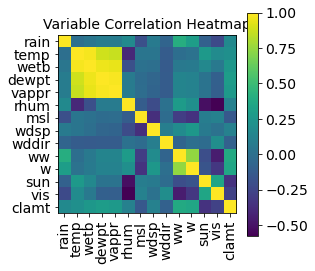

In [4]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Variable Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(data.iloc[:,1:])

Variables that seems to be relevant and not redundant are:
- precipitation amount (dependent variable)
- Air temperature
- Relative humidity
- Mean sea level pressure
- Mean hourly wind speed
- Visibility
- Cloud amount

In [6]:
data = data.drop('wetb', axis=1)
data = data.drop('dewpt', axis=1)
data = data.drop('vappr', axis=1)
data = data.drop('w', axis=1)
data = data.drop('ww', axis=1)
data = data.drop('wddir', axis=1)
data = data.drop('sun', axis=1)

In [ ]:
split_fraction = 0.715
train_split = int(split_fraction * int(data.shape[0]))

In [ ]:
data_norm = normalize (data, train_split)

Prediction after 24 hours considering the last month

In [32]:
prediction_1LSTM(data_norm, a=32)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 720, 6)]          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                4992      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
734/734 [==============================] - 763s 1s/step - loss: 0.9767 - val_loss: 0.9864

Epoch 00001: val_loss improved from inf to 0.98644, saving model to model_checkpoint.h5
Epoch 2/10
734/734 [==============================] - 651s 886ms/step - loss: 0.9653 - val_loss: 0.9853

Epoch 00002: val_loss improved from 0.98644 to 0.98530, saving model to model_checkpoin

Prediction after 24 hours considering the last two weeks.

In [33]:
prediction_1LSTM(data_norm, past=336, a=32)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 336, 6)]          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                4992      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
736/736 [==============================] - 241s 324ms/step - loss: 0.9691 - val_loss: 1.0128

Epoch 00001: val_loss improved from inf to 1.01275, saving model to model_checkpoint.h5
Epoch 2/10
736/736 [==============================] - 230s 312ms/step - loss: 0.9538 - val_loss: 1.0116

Epoch 00002: val_loss improved from 1.01275 to 1.01158, saving model to model_checkp

Prediction after 24 hours considering the last two weeks, trying with a lower dimension of the LSTM output

In [101]:
prediction_1LSTM(data_norm, past=336, a=10)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 336, 6)]          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                680       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
736/736 [==============================] - 77s 98ms/step - loss: 0.9858 - val_loss: 1.0141

Epoch 00001: val_loss improved from inf to 1.01408, saving model to model_checkpoint.h5
Epoch 2/10
736/736 [==============================] - 93s 121ms/step - loss: 0.9555 - val_loss: 1.0124

Epoch 00002: val_loss improved from 1.01408 to 1.01238, saving model to model_checkpoint.h5

Prediction after 24 hours considering the last two weeks, trying with a higher dimension of the LSTM output

In [34]:
prediction_1LSTM(data_norm, past=336, a=64)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 336, 6)]          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                18176     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 18,241
Trainable params: 18,241
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
736/736 [==============================] - 378s 511ms/step - loss: 0.9671 - val_loss: 1.0140

Epoch 00001: val_loss improved from inf to 1.01400, saving model to model_checkpoint.h5
Epoch 2/10
736/736 [==============================] - 366s 497ms/step - loss: 0.9545 - val_loss: 1.0126

Epoch 00002: val_loss improved from 1.01400 to 1.01260, saving model to model_chec

Prediction considering the last two weeks, changing the batch size from 256 to 128.

In [35]:
prediction_1LSTM(data_norm, past=336, a=32, batch_size=128)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 336, 6)]          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                4992      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1471/1471 [==============================] - 217s 146ms/step - loss: 0.9674 - val_loss: 1.0141

Epoch 00001: val_loss improved from inf to 1.01408, saving model to model_checkpoint.h5
Epoch 2/10
1471/1471 [==============================] - 214s 145ms/step - loss: 0.9548 - val_loss: 1.0123

Epoch 00002: val_loss improved from 1.01408 to 1.01227, saving model to model_ch

Prediction considering the last two weeks, using a neural network with 3 dense layers.

In [60]:
prediction_DENSE(data_norm, past=336)

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 336, 6)]          0         
_________________________________________________________________
dense_19 (Dense)             (None, 336, 50)           350       
_________________________________________________________________
dense_20 (Dense)             (None, 336, 20)           1020      
_________________________________________________________________
dense_21 (Dense)             (None, 336, 5)            105       
_________________________________________________________________
dense_22 (Dense)             (None, 336, 1)            6         
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
736/736 [==============================] - 40s 53ms/step - loss: 1.0231 - val_loss: 1.0186

Epoch 00001: v

Prediction considering the last two weeks, using a neural network with 1 LSTM layer and 1 dense layer

In [68]:
prediction_1LSTM_2D(data_norm, a=32, b=10, past=336)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 336, 6)]          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                4992      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 5,333
Trainable params: 5,333
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
736/736 [==============================] - 230s 309ms/step - loss: 0.9711 - val_loss: 1.0137

Epoch 00001: val_loss improved from inf to 1.01373, saving model to model_checkpoint.h5
Epoch 2/10
736/736 [==============================] - 26

Prediction considering the last two weeks, using a GRU layer

In [69]:
prediction_1GRU(data_norm, a=32, past=336)

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 336, 6)]          0         
_________________________________________________________________
gru (GRU)                    (None, 32)                3840      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 3,873
Trainable params: 3,873
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
736/736 [==============================] - 448s 604ms/step - loss: 0.9618 - val_loss: 1.0146

Epoch 00001: val_loss improved from inf to 1.01461, saving model to model_checkpoint.h5
Epoch 2/10
736/736 [==============================] - 460s 625ms/step - loss: 0.9567 - val_loss: 1.0136

Epoch 00002: val_loss improved from 1.01461 to 1.01358, saving model to model_check

Prediction considering the last two weeks, using a GRU and a dense layer

In [70]:
prediction_1GRU_2D(data_norm, a=32, b=10, past=336)

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 336, 6)]          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                3840      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 4,181
Trainable params: 4,181
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
736/736 [==============================] - 208s 278ms/step - loss: 0.9833 - val_loss: 1.0140

Epoch 00001: val_loss improved from inf to 1.01395, saving model to model_checkpoint.h5
Epoch 2/10
736/736 [==============================] - 22

Prediction considering the last month, using a GRU layer with a lower dimension of the output

In [71]:
prediction_1GRU(data_norm, a=10)

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 720, 6)]          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 10)                540       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
734/734 [==============================] - 173s 232ms/step - loss: 1.0017 - val_loss: 0.9863

Epoch 00001: val_loss improved from inf to 0.98632, saving model to model_checkpoint.h5
Epoch 2/10
734/734 [==============================] - 172s 234ms/step - loss: 0.9665 - val_loss: 0.9844

Epoch 00002: val_loss improved from 0.98632 to 0.98440, saving model to model_checkpoin

Prediction considering the last month, using a GRU, a LSTM and a dense layer

In [106]:
prediction_1GRU_1LSTM_1DENSE(data_norm, a=20, b=10, c=5)

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 720, 6)]          0         
_________________________________________________________________
gru_4 (GRU)                  (None, 720, 20)           1680      
_________________________________________________________________
lstm_11 (LSTM)               (None, 10)                1240      
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 6         
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
734/734 [==============================] - 977s 1s/step - loss: 0.9799 - val_loss: 0.9866

Epoch 00001: va

Trying with not normalised data: results are much more satisfying. We continue the analysis [here](Data.ipynb)

In [10]:
prediction_1GRU(data.drop('date', axis=1), a=10)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 720, 6)]          0         
                                                                 
 gru_1 (GRU)                 (None, 10)                540       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
734/734 [==============================] - ETA: 0s - loss: 0.3199
Epoch 1: val_loss improved from inf to 0.21272, saving model to model_checkpoint.h5
734/734 [==============================] - 281s 376ms/step - loss: 0.3199 - val_loss: 0.2127
Epoch 2/10
734/734 [==============================] - ETA: 0s - lo